In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
m = pd.read_csv("2_half_circle.csv")
m["T"] = m.t / m.N
m["Terr"] = 0.3 / m.N
m.head()

,h,N,t,T,Terr
0,6,10,41.884,4.188400,0.030000
1,6,10,41.984,4.198400,0.030000
2,6,10,41.903,4.190300,0.030000
3,6,10,41.829,4.182900,0.030000
4,6,11,46.126,4.193273,0.027273


In [3]:
graph = pd.DataFrame()
graph["T"] = m.groupby("h").agg({"T": "mean"})["T"].values
graph["Terr"] = m.groupby("h").agg({"Terr": "mean"})["Terr"].values
graph["h"] = m.groupby("h").agg({"T": "mean"})["T"].index


graph.sort_values("h")
graph["h"] = graph["h"] + 9
graph["herr"] = np.array([0.1] * len(graph))
graph.head()

,T,Terr,h,herr
0,3.056267,0.028,0,0.1
1,3.110187,0.028,3,0.1
2,3.260080,0.030,6,0.1
3,3.478640,0.030,9,0.1
4,3.814467,0.028,12,0.1


In [4]:
for_regression = pd.DataFrame()
for_regression["x"] = graph["h"] ** 2
for_regression["y"] = graph["T"] ** 2
for_regression["xerr"] = 2 * graph["herr"]
for_regression["yerr"] = 2 * graph["Terr"]

In [5]:
for_regression.to_csv("regr.csv", index=False)

In [6]:
for_regression = pd.read_csv("regr.csv")

In [7]:
for_regression

,x,y,xerr,yerr
0,0,9.340766,0.2,0.056000
1,9,9.673261,0.2,0.056000
2,36,10.628122,0.2,0.060000
3,81,12.100936,0.2,0.060000
4,144,14.550156,0.2,0.056000
5,225,17.561586,0.2,0.058909


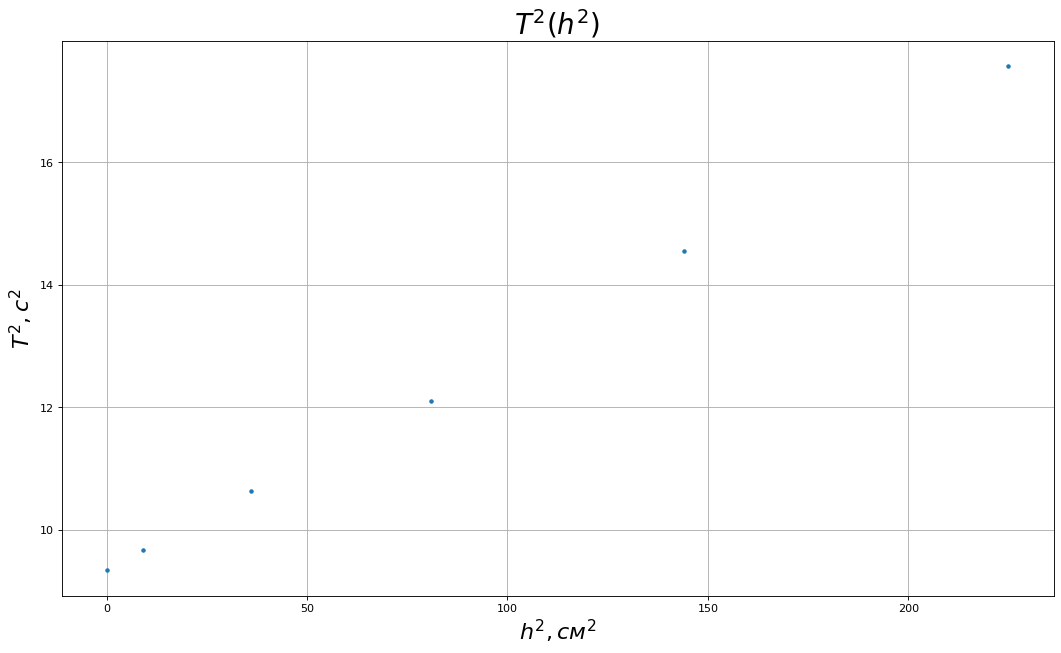

In [8]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_regression["x"], y=for_regression["y"], fmt='.')
plt.title(r"$T^2(h^2)$", fontsize=25)
plt.xlabel(r"$h^2, см^2$", fontsize=20)
plt.ylabel(r"$T^2, с^2$", fontsize=20)
plt.grid(True)

In [9]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= for_regression["x"], ydata=for_regression["y"], )

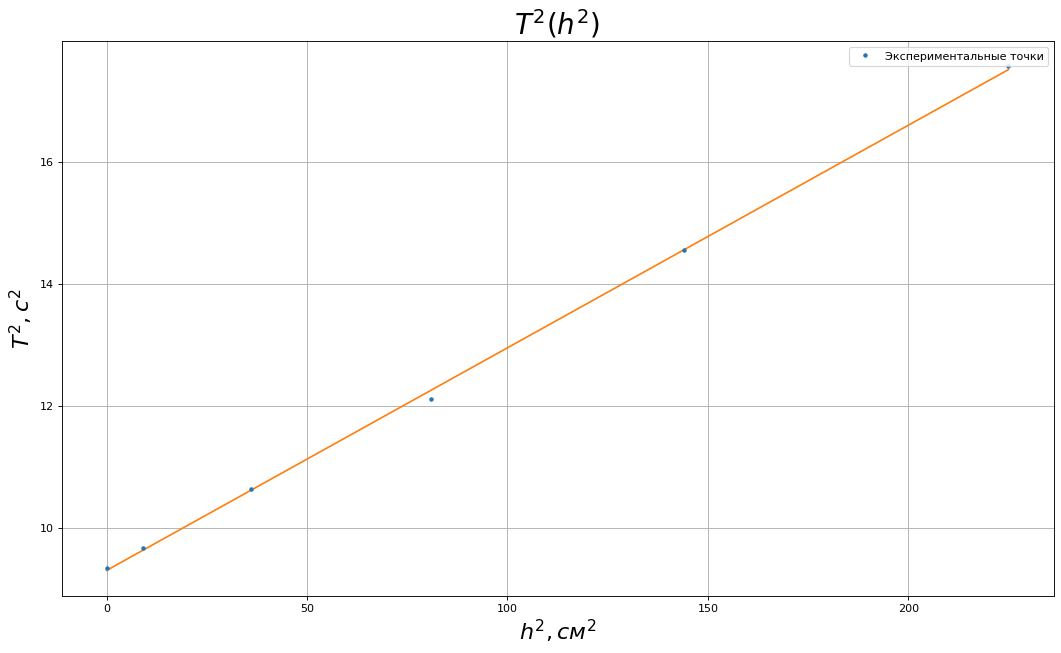

In [10]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=for_regression["x"], y=for_regression["y"], fmt='.', label='Экспериментальные точки')
plt.title(r"$T^2(h^2)$", fontsize=25)
plt.xlabel(r"$h^2, см^2$", fontsize=20)
plt.ylabel(r"$T^2, с^2$", fontsize=20)
plt.grid(True)
plt.legend()
plt.plot(for_regression["x"], line(for_regression["x"], params[0], params[1]), label="Истиная зависимость")

In [11]:
print(f"a = {params[0]:.3} \u00B1 {np.sqrt(cov[0][0]):.2}")
print(f"b = {params[1]:.3} \u00B1 {np.sqrt(cov[1][1]):.2}")

a = 0.0365 ± 0.00045
b = 9.3 ± 0.051


Test labs module

In [12]:
from labs import Value, add_errors, get_var, get_err

ModuleNotFoundError: No module named 'labs'

In [ ]:
m = pd.read_csv("2_half_circle.csv")
m["T"] = m.t / m.N
m["Terr"] = 0.3 / m.N

In [ ]:
m["T"] = m["T"].apply(add_errors(m["Terr"]))

In [ ]:
graph = pd.DataFrame()
graph["T"] = m.groupby("h").agg({"T": "mean"})["T"].values
graph["Terr"] = m.groupby("h").agg({"Terr": "mean"})["Terr"].values
graph["h"] = m.groupby("h").agg({"T": "mean"})["T"].index


graph.sort_values("h")
graph["h"] = graph["h"] + 9
graph["herr"] = np.array([0.1] * len(graph))
graph.head()

,T,Terr,h,herr
0,3.056267,0.028,0,0.1
1,3.110187,0.028,3,0.1
2,3.260080,0.030,6,0.1
3,3.478640,0.030,9,0.1
4,3.814467,0.028,12,0.1


In [ ]:
labs_test = pd.DataFrame()
labs_test["h"] = graph["h"].apply(add_errors(graph["herr"]))
labs_test["T"] = graph["T"].apply(add_errors(graph["Terr"]))
labs_test["x"] = labs_test["h"] ** 2
labs_test["y"] = labs_test["T"] ** 2
labs_test.head() 

,h,T,x,y
0,(0.000000±0.100000),(3.056267±0.028000),(0.000000±0.000000),(9.340766±0.171151)
1,(3.000000±0.100000),(3.110187±0.028000),(9.000000±0.600000),(9.673261±0.174170)
2,(6.000000±0.100000),(3.260080±0.030000),(36.000000±1.200000),(10.628122±0.195605)
3,(9.000000±0.100000),(3.478640±0.030000),(81.000000±1.800000),(12.100936±0.208718)
4,(12.000000±0.100000),(3.814467±0.028000),(144.000000±2.400000),(14.550156±0.213610)


In [ ]:
for_regression

,x,y,xerr,yerr
0,0,9.340766,0.2,0.056000
1,9,9.673261,0.2,0.056000
2,36,10.628122,0.2,0.060000
3,81,12.100936,0.2,0.060000
4,144,14.550156,0.2,0.056000
5,225,17.561586,0.2,0.058909


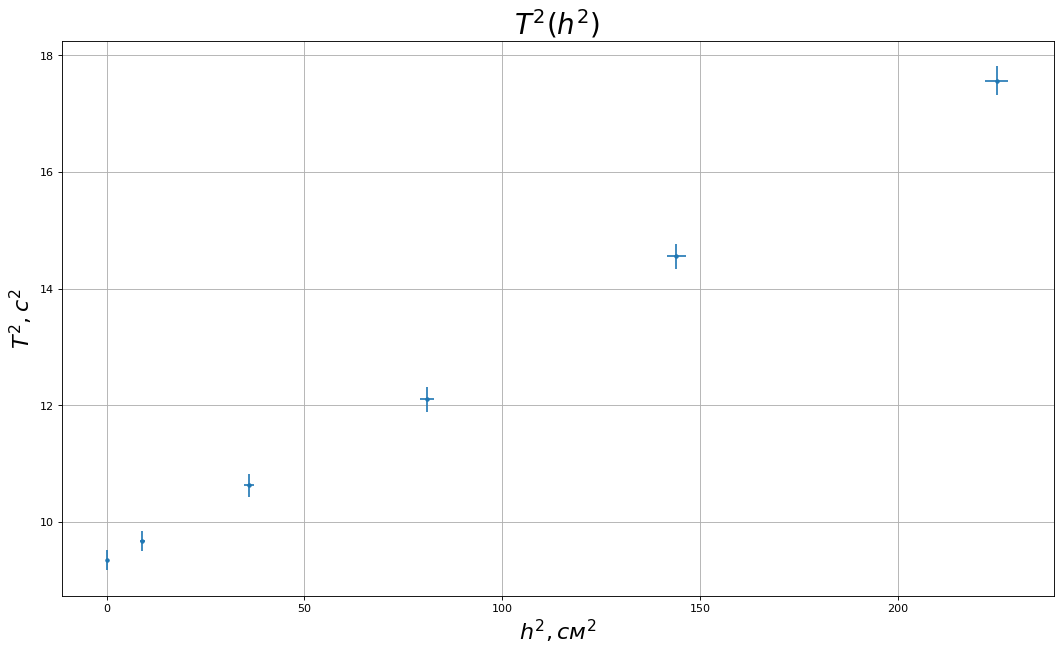

In [ ]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=labs_test["x"].apply(get_var), y=labs_test["y"].apply(get_var), 
             xerr=labs_test["x"].apply(get_err), yerr=labs_test["y"].apply(get_err), fmt='.')
plt.title(r"$T^2(h^2)$", fontsize=25)
plt.xlabel(r"$h^2, см^2$", fontsize=20)
plt.ylabel(r"$T^2, с^2$", fontsize=20)
plt.grid(True)